<a href="https://colab.research.google.com/github/ev1025/CP1/blob/main/Code_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인스타카트 데이터 분석

참고자료 : 케글 인스타카트 장바구니 분석 데이터     
https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis

# 1. CRISP-DM 기반 분석

## 1) 비즈니스이해

## 2) 데이터 이해

## 3) 데이터 전처리

In [1]:
# 한글 그래프 폰트(런타임재시작, plt.rc('font', family='NanumBarunGothic'))
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/인스타카트/aisles.csv')               # 소분류
df2 = pd.read_csv('/content/drive/MyDrive/인스타카트/departments.csv')          # 대분류
df3 = pd.read_csv('/content/drive/MyDrive/인스타카트/order_products__prior.csv')
df4 = pd.read_csv('/content/drive/MyDrive/인스타카트/order_products__train.csv')
df5 = pd.read_csv('/content/drive/MyDrive/인스타카트/orders.csv')
df6 = pd.read_csv('/content/drive/MyDrive/인스타카트/products.csv')

In [14]:
df1.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [15]:
df2.isnull().sum()

department_id    0
department       0
dtype: int64

In [16]:
df3.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [17]:
df4.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [18]:
df5.isnull().sum() # 현재 주문 이전 주문과의 텀(데이터 유지)

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [19]:
df6.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [3]:
# 데이터 합치는 함수
def df_merge(t1,t2,t3):
    data = pd.merge(t1,t2)
    data = pd.merge(data,t3)
    return data

In [4]:
df_prior = df_merge(df3,df5,df6)
df_train = df_merge(df4,df5,df6)

In [5]:
# 그래프분석에 사용할 데이터 만들기
prior_graph = df_prior.drop(['product_id','aisle_id','department_id','eval_set'],axis=1)
train_graph = df_train.drop(['product_id','aisle_id','department_id','eval_set'],axis=1)

In [6]:
# 컬럼명 변경
def df_rename(data):
    data.columns = ['주문번호','선택순서','재주문','유저번호','누적주문','요일','주문시간','주문텀','제품']
    return data

In [7]:
prior_graph = df_rename(prior_graph)
train_graph = df_rename(train_graph)

In [13]:
# CSV로 저장
# df_prior.to_csv(index=False)
# df_train.to_csv('file.csv',index=False)

In [23]:
product_count = train_graph['제품'].value_counts()

In [35]:
top_5 = product_count[:5].to_frame().reset_index()

In [55]:
top_5.rename(columns={'index':'제품명'},inplace=True)

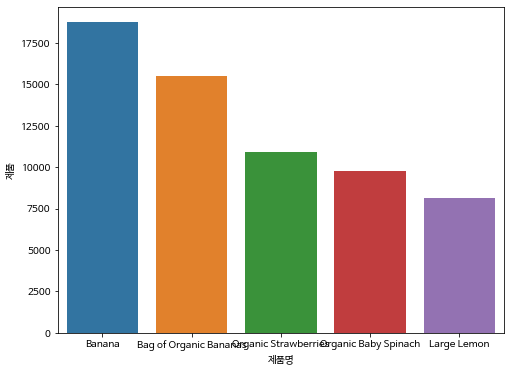

In [57]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(8,6))
sns.barplot(data = top_5, x='제품명',y='제품')
plt.show()

## 4) 모델링

## 5) 평가

## 6) 배포